HERE I START THE CODE BY IMPORTING THE LIBRARIES THAT IS USE FULL IN EDA


In [20]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


In [21]:
df = pd.read_csv("Breast_cancer.csv")
df.head()

,Age,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
0,68,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,4,Positive,Positive,24,1,60,Alive
1,50,White,Married,T2,N2,IIIA,Moderately differentiated,2,Regional,35,Positive,Positive,14,5,62,Alive
2,58,White,Divorced,T3,N3,IIIC,Moderately differentiated,2,Regional,63,Positive,Positive,14,7,75,Alive
3,58,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,18,Positive,Positive,2,1,84,Alive
4,47,White,Married,T2,N1,IIB,Poorly differentiated,3,Regional,41,Positive,Positive,3,1,50,Alive


USING THIS I GET TO THE DATAFRAME WITH COLUMNS AND ALL DATA

In [22]:
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4024 entries, 0 to 4023
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Age                     4024 non-null   int64 
 1   Race                    4024 non-null   object
 2   Marital Status          4024 non-null   object
 3   T Stage                 4024 non-null   object
 4   N Stage                 4024 non-null   object
 5   6th Stage               4024 non-null   object
 6   differentiate           4024 non-null   object
 7   Grade                   4024 non-null   object
 8   A Stage                 4024 non-null   object
 9   Tumor Size              4024 non-null   int64 
 10  Estrogen Status         4024 non-null   object
 11  Progesterone Status     4024 non-null   object
 12  Regional Node Examined  4024 non-null   int64 
 13  Reginol Node Positive   4024 non-null   int64 
 14  Survival Months         4024 non-null   int64 
 15  Stat

In [4]:
# NOW CHECK FOR MISSING VALUES or NULL VALUES
df.isnull().sum()

Age                       0
Race                      0
Marital Status            0
T Stage                   0
N Stage                   0
6th Stage                 0
differentiate             0
Grade                     0
A Stage                   0
Tumor Size                0
Estrogen Status           0
Progesterone Status       0
Regional Node Examined    0
Reginol Node Positive     0
Survival Months           0
Status                    0
dtype: int64

In [23]:
df.shape

(4024, 16)

# CHECKING DUPLICATES AND REMOVING IT FROM DATA

In [24]:
# NOW  CHECK FOR DUPLICATE VALUES
df.duplicated().sum()

np.int64(1)

In [25]:
#  which rows were duplicated

df[df.duplicated(keep=False)]

,Age,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
213,63,White,Married,T1,N1,IIA,Moderately differentiated,2,Regional,17,Positive,Positive,9,1,56,Alive
436,63,White,Married,T1,N1,IIA,Moderately differentiated,2,Regional,17,Positive,Positive,9,1,56,Alive


In [26]:
df.drop_duplicates(inplace = True)

df.duplicated().any()

np.False_

# CLEANING THE DATA FOR BETTER ANALYSIS

In [27]:

df.loc[df['Grade'].str.contains('Grade IV', case=False, na=False), 'Grade'] = '4'


In [10]:
df['Grade'] = df['Grade'].astype(int)

In [13]:
df['Grade'].dtype

dtype('int64')

In [11]:
df[(df['Grade'] != 1) & (df['Grade'] != 2) & (df['Grade'] != 3)].head(3)

,Age,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
277,52,Black,Single,T3,N3,IIIC,Undifferentiated,4,Regional,100,Positive,Positive,23,17,16,Dead
616,38,White,Married,T3,N1,IIIA,Undifferentiated,4,Regional,70,Positive,Positive,10,1,102,Alive
618,37,Black,Married,T3,N1,IIIA,Undifferentiated,4,Regional,60,Positive,Positive,5,2,97,Alive


In [28]:
# CHECKING MARITAL_STATUS COLUMN VALUE COUNTS
df['Marital Status'].value_counts()

Marital Status
Married      2642
Single        615
Divorced      486
Widowed       235
Separated      45
Name: count, dtype: int64

In [29]:
# T STAGE COLUMN VALUE COUNTS
df['T Stage '].value_counts()

T Stage 
T2    1786
T1    1602
T3     533
T4     102
Name: count, dtype: int64

In [30]:
#  N STAGE COLUMN VALUE COUNTS
df['N Stage'].value_counts()

N Stage
N1    2731
N2     820
N3     472
Name: count, dtype: int64

In [31]:
# DIFFERENTIATION COLUMN VALUE COUNTS
df['differentiate'].value_counts()

differentiate
Moderately differentiated    2350
Poorly differentiated        1111
Well differentiated           543
Undifferentiated               19
Name: count, dtype: int64

# NOW FROM HERE WE SEE VISUALISATION AND EDA

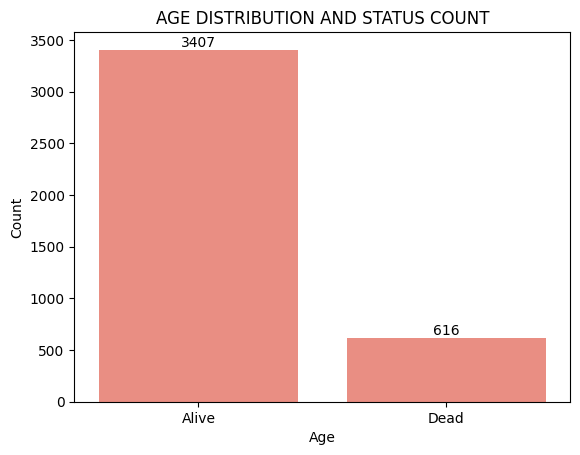

In [ ]:
# NOW CHECKING VISUALISATIONS FOR AGE WHICH ARE ALIVE AND DEAD IN THIS DATASET
sns.histplot(df['Age'])
ax = sns.countplot(x='Status', data=df , color='salmon' )
for bars in ax.containers:
    ax.bar_label(bars)  
plt.title("AGE DISTRIBUTION AND STATUS COUNT")
plt.show()



In [ ]:
# CATEGORIZING AGE INTO GROUPS USING BINS

df['Age_Group'] = pd.cut(df['Age'], bins=[20, 40, 60, 80], labels=['Young 20-40', 'Middle_Aged 40-60', 'Old 60+'])

In [69]:
# NOW AGE WISE DISTRIBUTION OF STATUS 

pd.crosstab(df['Age_Group'], df['Status'])

Status,Alive,Dead
Age_Group,,
Young 20-40,247,55
Middle_Aged 40-60,2250,332
Old 60+,910,229


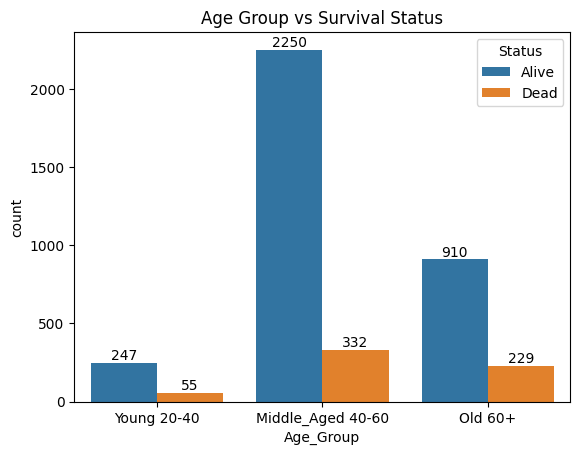

In [70]:
# Age distribution Young vs old survival comparison

dx = sns.countplot(x='Age_Group', hue='Status', data=df)
for bars in dx.containers:
    dx.bar_label(bars)
plt.title("Age Group vs Survival Status")
plt.show()

# Race-wise patient distribution 

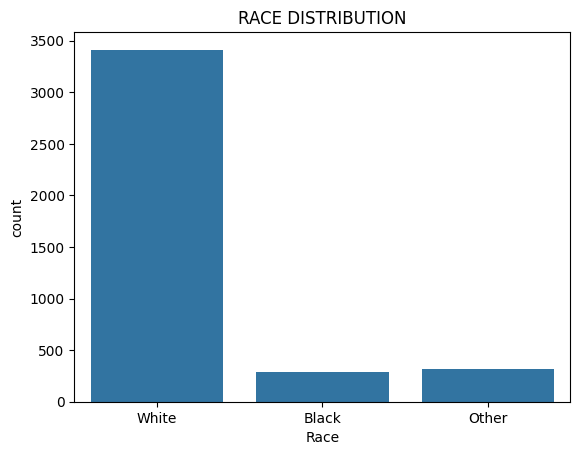

In [33]:

# RACE COLUMN VALUE COUNTS  
df['Race'].value_counts()
sns.countplot(x='Race', data=df) 
plt.title("RACE DISTRIBUTION")  
plt.show()  

In [37]:
RACE_WISE_DISTRIBUTION = df.groupby('Race')['Status'].value_counts()
print(RACE_WISE_DISTRIBUTION)

Race   Status
Black  Alive      218
       Dead        73
Other  Alive      287
       Dead        33
White  Alive     2902
       Dead       510
Name: count, dtype: int64


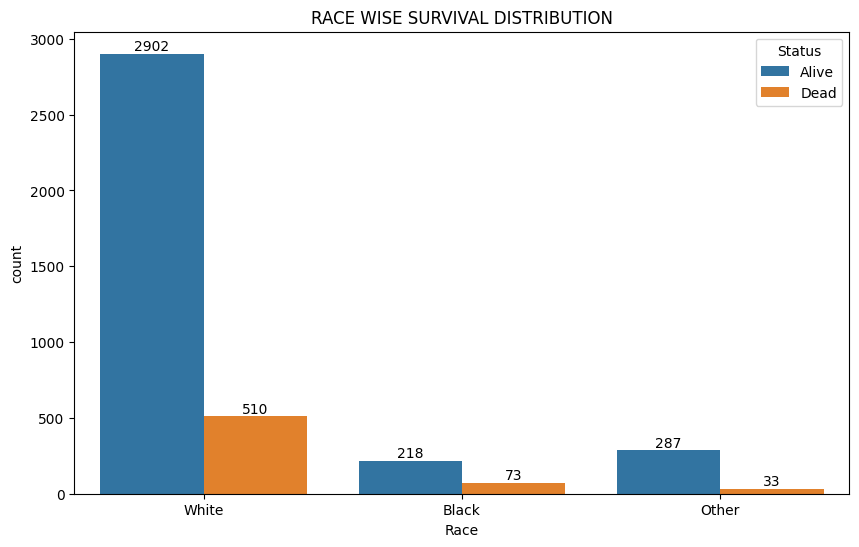

In [ ]:
# visualization of race wise   distribution who is suffering from breast cancer
plt.figure(figsize=(10,6))
race_plot = sns.countplot(x='Race', hue='Status', data=df)
for bars in race_plot.containers:
    race_plot.bar_label(bars)
plt.title("RACE WISE SURVIVAL DISTRIBUTION")   
plt.show()

Race               Black  Other  White
Age_Group                             
Young 20-40           30     43    229
Middle_Aged 40-60    193    206   2183
Old 60+               68     71   1000


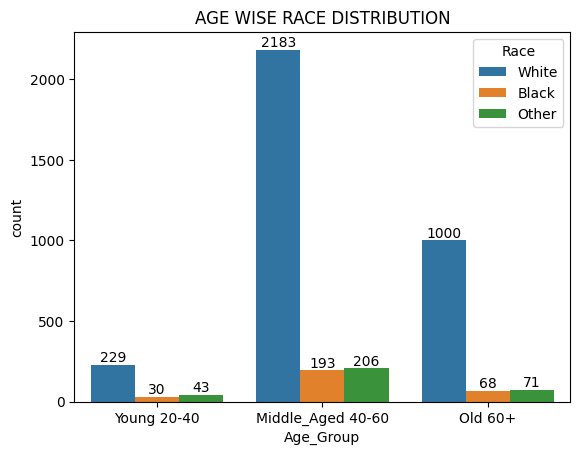

In [39]:
# AGE WISE RACE DISTRIBUTION VISULALISATION
age_wise_race = pd.crosstab(df['Age_Group'], df['Race'])
print(age_wise_race)
sns.countplot(data=df, x='Age_Group' , hue = 'Race')
for bars in plt.gca().containers:
    plt.gca().bar_label(bars)
plt.title("AGE WISE RACE DISTRIBUTION")
plt.show()      


In [ ]:
# NOW CHECKING T STAGE  WISE SURVIVAL DISTRIBUTION
t_stage_survival = df.groupby('T Stage ')['Status'].value_counts()
print(t_stage_survival)

T Stage   Status
T1        Alive     1445
          Dead       157
T2        Alive     1483
          Dead       303
T3        Alive      417
          Dead       116
T4        Alive       62
          Dead        40
Name: count, dtype: int64


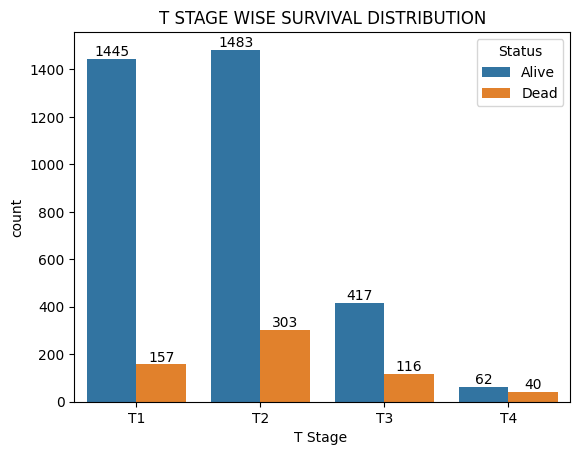

In [40]:
T_stage_visualization = sns.countplot(data=df, x='T Stage ' , hue='Status')
for bars in T_stage_visualization.containers:
    T_stage_visualization.bar_label(bars)
plt.title("T STAGE WISE SURVIVAL DISTRIBUTION")
plt.show()    

In [ ]:
# NOW AGE WISE T STAGE DISTRIBUTION VISUALISATION
# print(age_wise_tstage)
age_wise_tstage = pd.crosstab(df['Age_Group'], df['T Stage '])
print(age_wise_tstage)


T Stage              T1    T2   T3  T4
Age_Group                             
Young 20-40         100   132   61   9
Middle_Aged 40-60  1009  1154  350  69
Old 60+             493   500  122  24


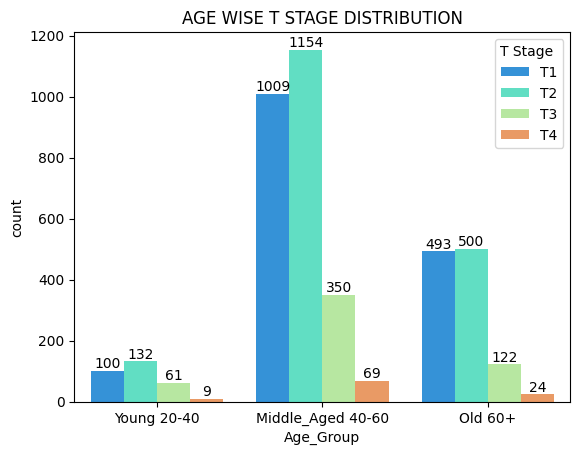

In [286]:
# NOW VISUALISING AGE WISE T STAGE DISTRIBUTION
age_wise_tstage_visulisation = sns.countplot(data=df, x='Age_Group', hue='T Stage ', palette='rainbow' )
for bars in age_wise_tstage_visulisation.containers:
    age_wise_tstage_visulisation.bar_label(bars)
plt.title("AGE WISE T STAGE DISTRIBUTION")
plt.show()    


In [308]:
# which age group has highest number of T Stage '4' cases
highest_tstage_age_group = df[df['T Stage '] == 'T4']['Age_Group'].value_counts()
print(highest_tstage_age_group)

Age_Group
Middle_Aged 40-60    69
Old 60+              24
Young 20-40           9
Name: count, dtype: int64


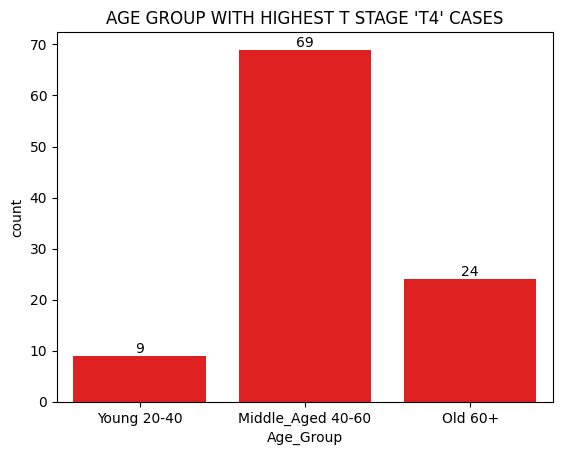

In [309]:
# VISUALISING HIGHEST T STAGE '4' AGE GROUP
highest_tstage_age_group_visualization = sns.countplot(x='Age_Group', data=df[df['T Stage '] == 'T4'], color='Red')
for bars in highest_tstage_age_group_visualization.containers:
    highest_tstage_age_group_visualization.bar_label(bars)       
plt.title("AGE GROUP WITH HIGHEST T STAGE 'T4' CASES")
plt.show()

In [42]:
# NOW THE NODE STAGE WISE SURVIVAL DISTRIBUTION
df['N Stage'].value_counts()

N Stage
N1    2731
N2     820
N3     472
Name: count, dtype: int64

In [43]:
# N Stage vs Survival Status (Alive / Dead)
pd.crosstab(df['N Stage'], df['Status'])

Status,Alive,Dead
N Stage,,
N1,2461,270
N2,655,165
N3,291,181


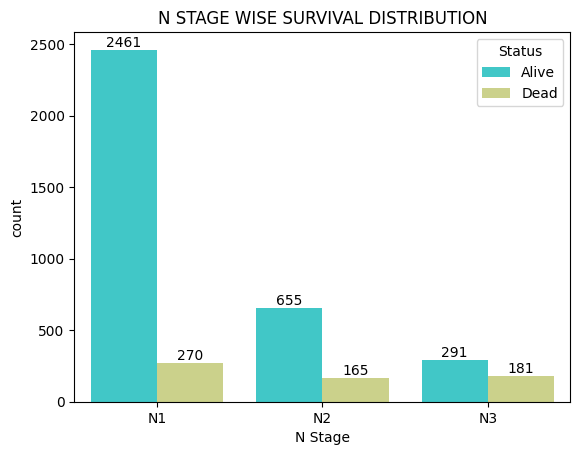

In [44]:
# N STAGE WISE SURVIVAL VISUALISATION
n_stage_survival_visualization = sns.countplot(data=df, x='N Stage', hue='Status', palette='rainbow')
for bars in n_stage_survival_visualization.containers:
    n_stage_survival_visualization.bar_label(bars)
plt.title("N STAGE WISE SURVIVAL DISTRIBUTION")
plt.show()

In [313]:
# RACE VS T STAGE DISTRIBUTION VS AGE GROUP

for age in df['Age_Group'].unique():
    print(f"\nAge_Group: {age}")
    print(pd.crosstab(
        df[df['Age_Group'] == age]['Race'],
        df[df['Age_Group'] == age]['T Stage ']
        

    ))


Age_Group: Old 60+
T Stage    T1   T2   T3  T4
Race                       
Black      29   33    4   2
Other      30   33    7   1
White     434  434  111  21

Age_Group: Middle_Aged 40-60
T Stage    T1   T2   T3  T4
Race                       
Black      75   87   24   7
Other      71  110   24   1
White     863  957  302  61

Age_Group: Young 20-40
T Stage   T1   T2  T3  T4
Race                     
Black     13   12   5   0
Other     12   19  10   2
White     75  101  46   7


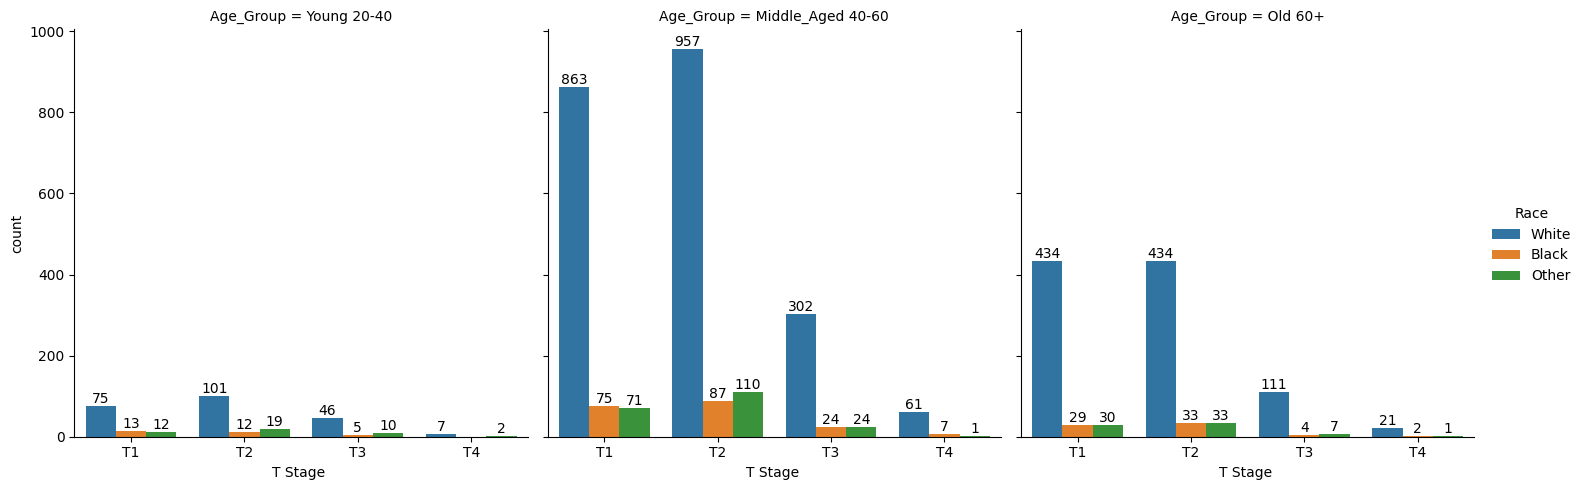

In [ ]:
# VISUALISING ALL THE AGE GROUPS AND RACE WISE T STAGE DISTRIBUTION 
VISUALIISING_RACE_TSTAGE_AGEGROUP = sns.catplot(
    x='T Stage ',
    hue='Race',
    col='Age_Group',
    data=df,
    kind='count'
)
for ax in VISUALIISING_RACE_TSTAGE_AGEGROUP.axes.flat:              # har subplot ke liye
    for container in ax.containers: # har hue bar ke liye
        ax.bar_label(container)

plt.show()



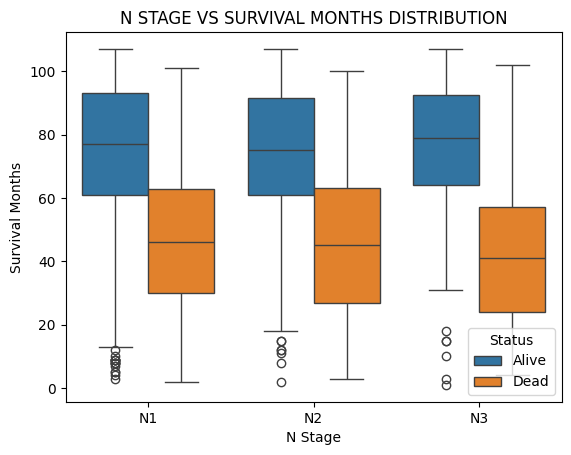

In [315]:
# N STAGE VS SURVIVAL MONTHS VISUALIZATION
sns.boxplot(x = 'N Stage', y = 'Survival Months' , data = df , hue='Status' )
plt.title("N STAGE VS SURVIVAL MONTHS DISTRIBUTION")
plt.show()





In [316]:
df['differentiate'].value_counts()

differentiate
Moderately differentiated    2350
Poorly differentiated        1111
Well differentiated           543
Undifferentiated               19
Name: count, dtype: int64

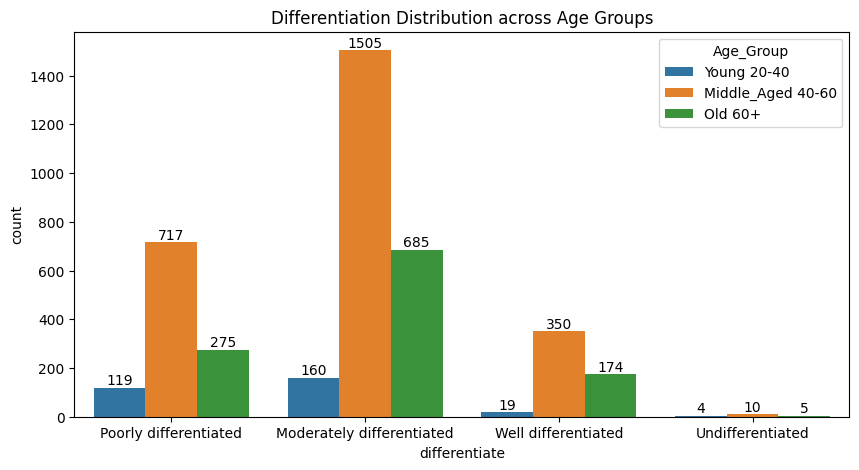

In [317]:
#Differentiation Distribution across Age Groups
plt.figure(figsize=(10, 5))
Distribution_of_differentiation_VS_AgeGroups = sns.countplot(x= 'differentiate', hue = 'Age_Group', data = df, width=0.8 )
for bars in Distribution_of_differentiation_VS_AgeGroups.containers:
    Distribution_of_differentiation_VS_AgeGroups.bar_label(bars)
  
plt.title("Differentiation Distribution across Age Groups")
plt.show()

In [318]:
# T STAGE VS 6thSTAGE CANCER STAGE VISUALISATION
pd.crosstab(df['T Stage '], df['6th Stage'])

6th Stage,IIA,IIB,IIIA,IIIB,IIIC
T Stage,,,,,
T1,1304,0,211,0,87
T2,0,1130,428,0,228
T3,0,0,411,0,122
T4,0,0,0,67,35


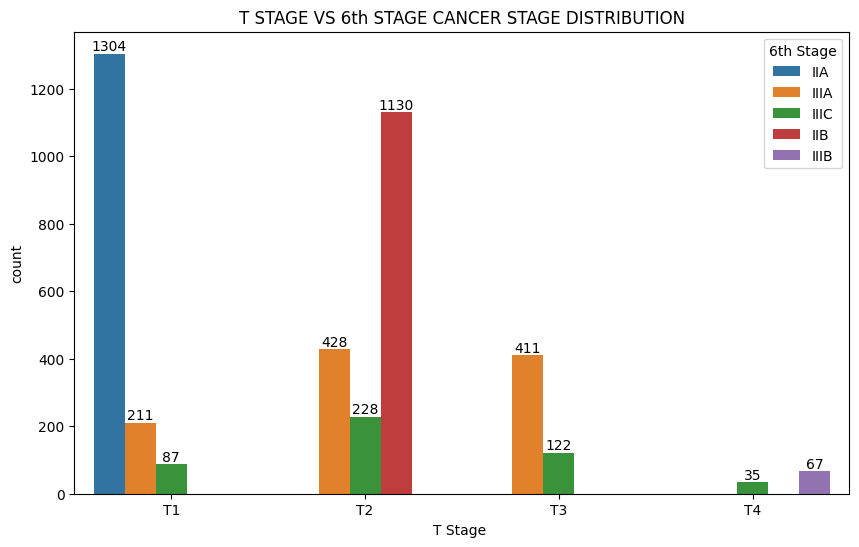

In [298]:
plt.figure(figsize=(10,6))
T_Stage_vs_6thStage_visualization = sns.countplot(x='T Stage ', hue='6th Stage', data=df)
for bars in T_Stage_vs_6thStage_visualization.containers:
    T_Stage_vs_6thStage_visualization.bar_label(bars)       
plt.title("T STAGE VS 6th STAGE CANCER STAGE DISTRIBUTION")    
plt.show()

In [319]:
# differentiate VS Grade
pd.crosstab(df['differentiate'], df['Grade'])


Grade,1,2,3,4
differentiate,,,,
Moderately differentiated,0,2350,0,0
Poorly differentiated,0,0,1111,0
Undifferentiated,0,0,0,19
Well differentiated,543,0,0,0


In [321]:
cat_cols = []

for col in df.columns:
    if df[col].dtype == 'object':
        cat_cols.append(col)

print(f"There are {len(cat_cols)} Categorical columns:")
cat_cols

There are 10 Categorical columns:


['Race',
 'Marital Status',
 'T Stage ',
 'N Stage',
 '6th Stage',
 'differentiate',
 'A Stage',
 'Estrogen Status',
 'Progesterone Status',
 'Status']

In [322]:
num_cols = []

for col in df.columns:
    if df[col].dtype == 'int64':
        num_cols.append(col)

print(f"There are {len(num_cols)} Numerical columns:")
num_cols

There are 6 Numerical columns:


['Age',
 'Grade',
 'Tumor Size',
 'Regional Node Examined',
 'Reginol Node Positive',
 'Survival Months']

In [336]:
# ESTROGEN VS TUMOR SIZE
# TUMOR SIZE WHO HAS NEGATIVE ESTROGEN STATUS
df[df['Estrogen Status']=='Negative']['Tumor Size'].describe()



count    269.000000
mean      35.174721
std       24.441889
min        2.000000
25%       20.000000
50%       28.000000
75%       45.000000
max      130.000000
Name: Tumor Size, dtype: float64

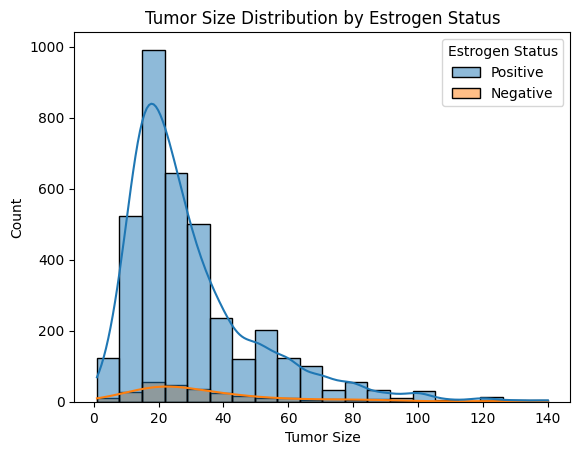

In [338]:
sns.histplot(
    data=df,
    x='Tumor Size',
    hue='Estrogen Status',
    bins=20,
    kde=True
)

plt.title("Tumor Size Distribution by Estrogen Status")
plt.show()

In [46]:
df['Large Tumor'] = df['Tumor Size'] >= 35

pd.crosstab(
    df['Estrogen Status'],
    df['Large Tumor'],
    normalize='index'
) * 100

Large Tumor,False,True
Estrogen Status,,
Negative,62.081784,37.918216
Positive,69.978689,30.021311


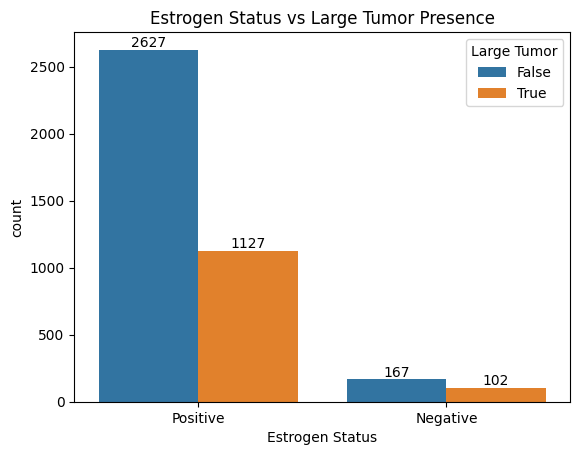

In [48]:
visualising_the_tumor = sns.countplot(
    data=df,
    x='Estrogen Status',
    hue='Large Tumor'
)
for bars in visualising_the_tumor.containers:
    visualising_the_tumor.bar_label(bars)
    
plt.title("Estrogen Status vs Large Tumor Presence")
plt.show()

# PERSON WITH (T3 , T4) AND (N2 , N3) WITH A GRADE 3 HAS HIGH RISK AND OTHERS IN LOW RISK


In [65]:
df['Risk'] = np.where(df['N Stage'].isin(['N2','N3'])|(df['T Stage '].isin(['T3', 'T4'])|(df['Grade'] == 3)), 'High Risk', 'Low Risk')
df['Risk'].value_counts()

Risk
Low Risk     2434
High Risk    1589
Name: count, dtype: int64

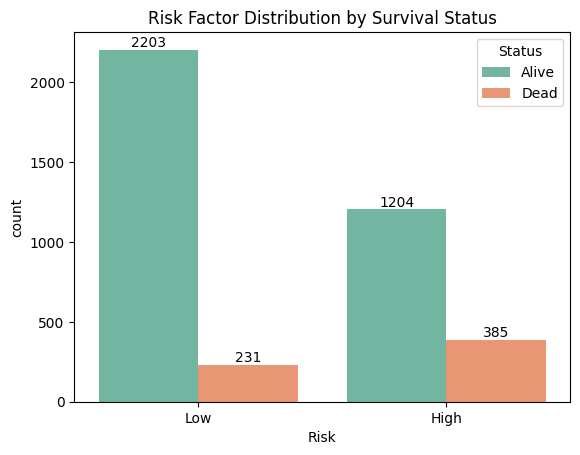

In [ ]:
# VISUALISING RISK FACTOR DISTRIBUTION
risk_factor_visualization = sns.countplot(
    data=df,
    x='Risk',
    hue='Status',
    palette='Set2'
)
for bars in risk_factor_visualization.containers:
    risk_factor_visualization.bar_label(bars)
plt.title("Risk Factor Distribution by Survival Status")